# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if ( city not in cities ):
        cities.append(city)
    


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']# YOUR CODE HERE
        city_lng = city_weather['coord']['lon']# YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all'] # YOUR CODE HERE
        city_wind =city_weather['wind']['speed'] # YOUR CODE HERE
        city_country = city_weather['sys']['country']# YOUR CODE HERE
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | simbahan
Processing Record 2 of Set 1 | marpod
Processing Record 3 of Set 1 | camacha
Processing Record 4 of Set 1 | gazojak
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | santa rosa
Processing Record 9 of Set 1 | izhma
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | maceio
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | komarikhinskiy
Processing Record 15 of Set 1 | souillac
Processing Record 16 of Set 1 | kapaa
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | alexandria
Processing Record 19 of Set 1 | clyde river
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | mayo
Processing Record 22 of Set 1 | kungurtug
Processing R

Processing Record 35 of Set 4 | pangai
Processing Record 36 of Set 4 | asfi
Processing Record 37 of Set 4 | shirokiy
Processing Record 38 of Set 4 | huntingdon
Processing Record 39 of Set 4 | phon
Processing Record 40 of Set 4 | kadykchan
City not found. Skipping...
Processing Record 41 of Set 4 | el campo
Processing Record 42 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 43 of Set 4 | paraiso
Processing Record 44 of Set 4 | guanica
Processing Record 45 of Set 4 | ginir
Processing Record 46 of Set 4 | chernyshevskiy
Processing Record 47 of Set 4 | srandakan
Processing Record 48 of Set 4 | kampot
Processing Record 49 of Set 4 | springfield
Processing Record 0 of Set 5 | puerto madero
Processing Record 1 of Set 5 | mys shmidta
City not found. Skipping...
Processing Record 2 of Set 5 | cherskiy
Processing Record 3 of Set 5 | sechura
Processing Record 4 of Set 5 | swan river
Processing Record 5 of Set 5 | flinders
Processing Record 6 of Set 5 | lamar
Processing Recor

City not found. Skipping...
Processing Record 22 of Set 8 | faanui
Processing Record 23 of Set 8 | burhar
Processing Record 24 of Set 8 | geraldton
Processing Record 25 of Set 8 | sao filipe
Processing Record 26 of Set 8 | jackson
Processing Record 27 of Set 8 | xochistlahuaca
Processing Record 28 of Set 8 | carutapera
Processing Record 29 of Set 8 | vila velha
Processing Record 30 of Set 8 | wangou
Processing Record 31 of Set 8 | sitka
Processing Record 32 of Set 8 | mitsamiouli
Processing Record 33 of Set 8 | tarakan
Processing Record 34 of Set 8 | mecca
Processing Record 35 of Set 8 | fare
Processing Record 36 of Set 8 | inirida
Processing Record 37 of Set 8 | margate
Processing Record 38 of Set 8 | mananara
Processing Record 39 of Set 8 | kara-tyube
Processing Record 40 of Set 8 | raudeberg
Processing Record 41 of Set 8 | oranjemund
Processing Record 42 of Set 8 | bubaque
Processing Record 43 of Set 8 | aksarka
Processing Record 44 of Set 8 | rundu
Processing Record 45 of Set 8 | k

Processing Record 14 of Set 12 | eureka
Processing Record 15 of Set 12 | tessalit
Processing Record 16 of Set 12 | kurilsk
Processing Record 17 of Set 12 | murray bridge
Processing Record 18 of Set 12 | westport
Processing Record 19 of Set 12 | shahr-e babak
Processing Record 20 of Set 12 | yaan
Processing Record 21 of Set 12 | beringovskiy
Processing Record 22 of Set 12 | stephenville
Processing Record 23 of Set 12 | port augusta
Processing Record 24 of Set 12 | komsomolskiy
Processing Record 25 of Set 12 | poshekhonye
Processing Record 26 of Set 12 | ust-tsilma
Processing Record 27 of Set 12 | lata
Processing Record 28 of Set 12 | doembang nangbuat
Processing Record 29 of Set 12 | atka
City not found. Skipping...
Processing Record 30 of Set 12 | barbar
City not found. Skipping...
Processing Record 31 of Set 12 | baruun-urt
Processing Record 32 of Set 12 | aykhal
Processing Record 33 of Set 12 | invermere
Processing Record 34 of Set 12 | manaure
Processing Record 35 of Set 12 | zhanao

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)
# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [6]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,simbahan,6.3032,120.5836,301.38,74,88,1.78,PH,1669998008
1,marpod,45.8714,24.4965,277.25,83,80,0.90,RO,1669998009
2,camacha,33.0833,-16.3333,290.83,68,75,8.75,PT,1669998009
3,gazojak,41.1875,61.4036,270.97,28,0,3.75,TM,1669998010
4,vaini,-21.2000,-175.2000,296.24,94,20,0.00,TO,1669998010


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,simbahan,6.3032,120.5836,301.38,74,88,1.78,PH,1669998008
1,marpod,45.8714,24.4965,277.25,83,80,0.90,RO,1669998009
2,camacha,33.0833,-16.3333,290.83,68,75,8.75,PT,1669998009
3,gazojak,41.1875,61.4036,270.97,28,0,3.75,TM,1669998010
4,vaini,-21.2000,-175.2000,296.24,94,20,0.00,TO,1669998010


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

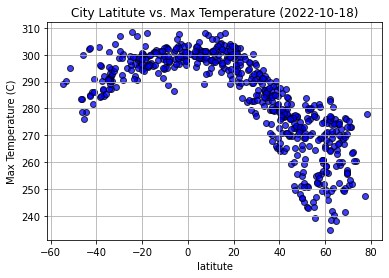

In [9]:
# Build scatter plot for latitude vs. temperature


# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize=(6, 4))
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75 )
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

plt.xlabel('latitute')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitute vs. Max Temperature (2022-10-18)')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

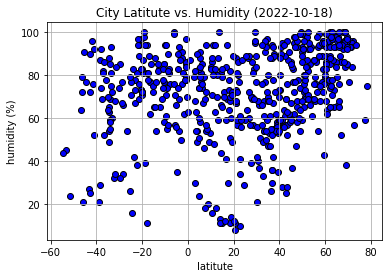

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('latitute')
plt.ylabel('humidity (%)')
plt.title('City Latitute vs. Humidity (2022-10-18)')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

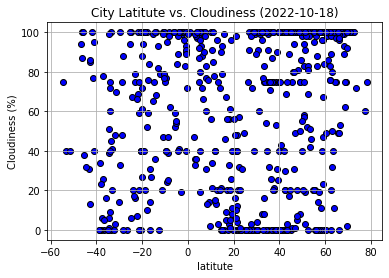

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
plt.xlabel('latitute')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitute vs. Cloudiness (2022-10-18)')
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

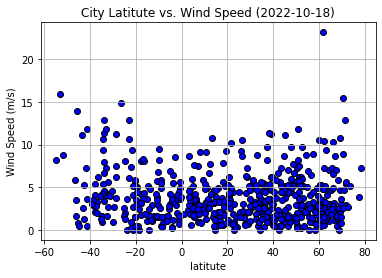

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker="o", facecolors="blue", edgecolors="black" )
plt.grid()
plt.xlabel('latitute')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitute vs. Wind Speed (2022-10-18)')

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0 , : ].reset_index(drop=True)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,simbahan,6.3032,120.5836,301.38,74,88,1.78,PH,1669998008
1,marpod,45.8714,24.4965,277.25,83,80,0.90,RO,1669998009
2,camacha,33.0833,-16.3333,290.83,68,75,8.75,PT,1669998009
3,gazojak,41.1875,61.4036,270.97,28,0,3.75,TM,1669998010
4,santa rosa,14.3122,121.1114,301.14,81,90,4.72,PH,1669997464


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0 , : ].reset_index(drop=True)

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vaini,-21.2000,-175.2000,296.24,94,20,0.00,TO,1669998010
1,saldanha,-33.0117,17.9442,290.13,60,41,7.20,ZA,1669998011
2,mataura,-46.1927,168.8643,283.42,72,100,1.66,NZ,1669998012
3,maceio,-9.6658,-35.7353,302.84,61,40,8.23,BR,1669998014
4,souillac,-20.5167,57.5167,298.36,73,40,1.54,MU,1669998015


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def regression_finder(x_values, y_values, y_label, x_axis_anno, y_axis_anno):
    (slope, intercept, rvalue, pvalue, stderr) = linregress( x_values, y_values )
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
    print(f'r value is {rvalue}')
   
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,xy=(x_axis_anno, y_axis_anno),xytext=(x_axis_anno, y_axis_anno),fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()
    
    
    
    return
    

r value is -0.8346854058729168


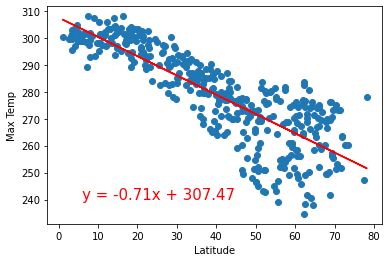

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 'Max Temp', 6, 240 )

r value is 0.6008325197259731


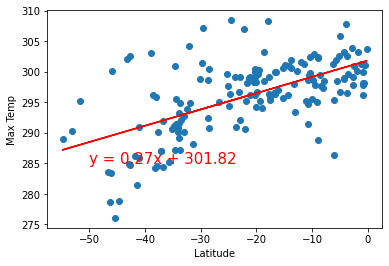

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 'Max Temp', -50, 285)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

r value is 0.3975682059923969


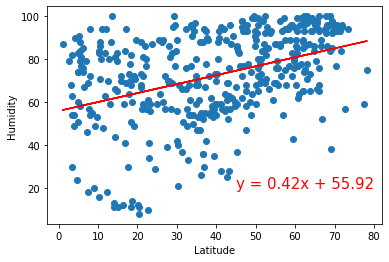

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 'Humidity', 45, 20)

r value is 0.2855005717070659


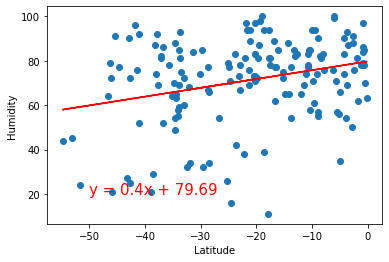

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 'Humidity', -50, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

r value is 0.24125504556574434


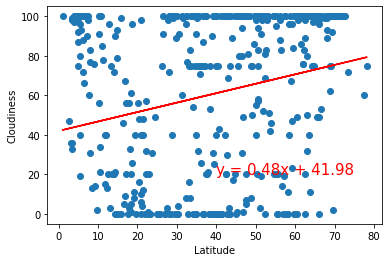

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 'Cloudiness', 40, 20)

r value is 0.3313837690589223


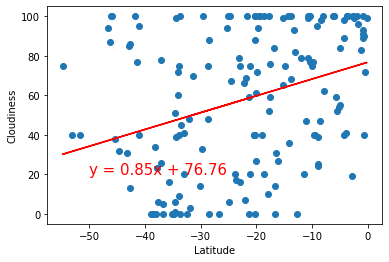

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 'Cloudiness', -50, 20)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

r value is 0.08363527995760314


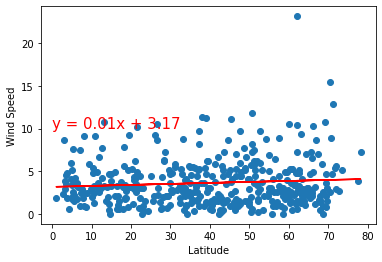

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
regression_finder( northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 'Wind Speed', 0, 10)

r value is -0.2922869978156624


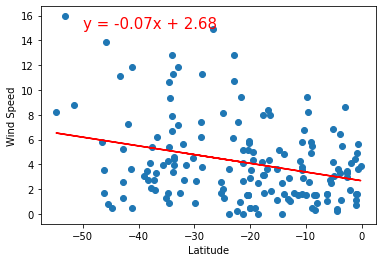

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
regression_finder( southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 'Wind Speed', -50, 15)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Linear regression captures the correlation between two variables. rvalue measures the correlation quantitively. Possible values of the correlation coefficient range from -1 to +1, with -1 indicating a perfectly linear negative, i.e., inverse, correlation (sloping downward) and +1 indicating a perfectly linear positive correlation (sloping upward).

Based on the analysis:
1. latitute and max temperature have a strong negative corralation (rvalues : 0.6 (nouthern) and 0.3 (southern) perspectively) 
2. latitude and humidity have weak positive correlation. The latitute increases, the humidity increases as well.rvalues : 0.14 (northern) and 0.08 (southern) perspectively) 
3. latitude and cloudiness have very weak positive correlation. The latitute increases, the cloudiness increases as well.rvalues : 0.05 (northern) and 0.03(southern) perspectively) 
4. About the wind speed, different trends can be observed. For northern hemisphere,latitude and wind speed have very weak positive correlation (rvaleu 0.01). However, for southern hemisphere, atitude and wind speed have weak negative correlation (rvaleu 0.105)


